### Language Model and Sequence Generation

So what a language model does is given any sentence is job is to tell you what is the probability of a sentence, of that particular sentence. And by probability of sentence I mean, if you want to pick up a random newspaper, open a random email or pick a random webpage or listen to the next thing someone says, the friend of you says. What is the chance that the next sentence you use somewhere out there in the world will be a particular sentence like the apple and pear salad? And this is a fundamental component for both speech recognition systems as you've just seen, as well as for machine translation systems where translation systems wants output only sentences that are likely.

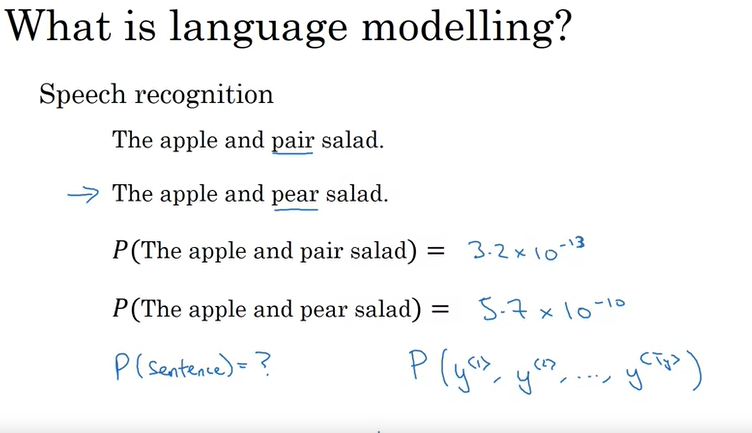

And so the basic job of a language model is to input a sentence, which I'm going to write as a sequence y(1), y(2) up to y(Ty). And for language model will be useful to represent a sentences as outputs y rather than inputs x. But what the language model does is it estimates the probability of that particular sequence of words.

<p>For each sequence it will give the proobability as P(sentence)</p>

### Sampling novel sequences

<p>After you train a sequence model, one of the ways you can informally get a sense of what is learned is to have a sample novel sequences.</p>

### Gated Recurrent Unit (GRU) 

<p>Gated Recurrent Unit which is a modification to the RNN hidden layer that makes it much better capturing long range connections and helps a lot with the vanishing gradient problems.</p>

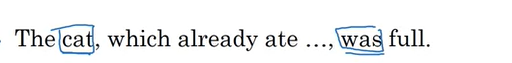

 <p>Given a sentence like "The cat already ate ............. was full", you might need to remember the cat was singular, to make sure you understand why that "was" rather than "were". So the [cat was for] or the [cats were for]. So as we read in this sentence from left to right, the GRU unit is going to have a new variable called c, which stands for cell, for memory cell. And what the memory cell do is it will provide a bit of memory to remember, for example, whether cat was singular or plural, so that when it gets much further into the sentence it can still work under consideration whether the subject of the sentence was singular or plural. And so at time t the memory cell will have some value c of t.</p>

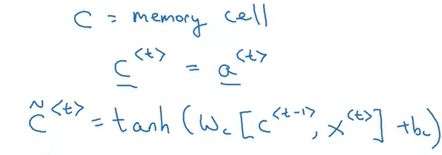

 And to develop your intuition about how GRUs work, think of gamma u, this gate value, as being always zero or one. Although in practice, your compute it with a sigmoid function applied to this. So remember that the sigmoid function looks like this. And so it's value is always between zero and one. And for most of the possible ranges of the input, the sigmoid function is either very, very close to zero or very, very close to one. So for intuition, think of gamma as being either zero or one most of the time

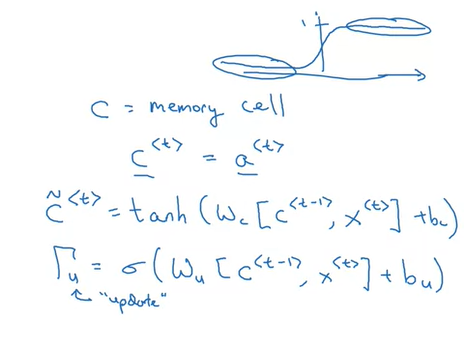

### Word Embeddings

Refer slides 

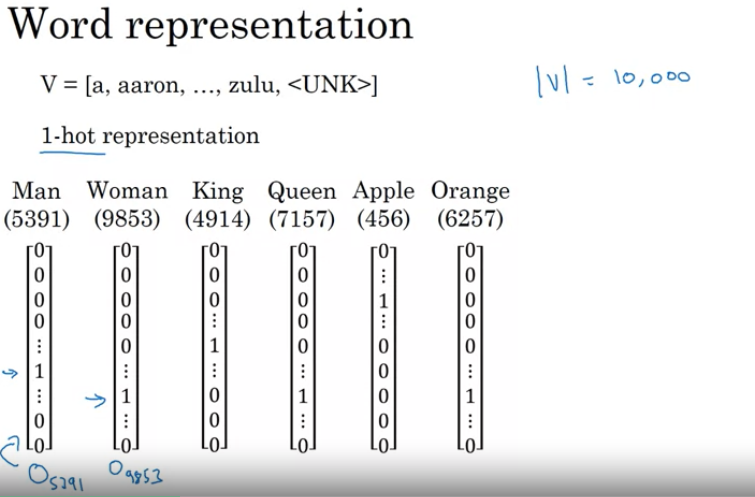

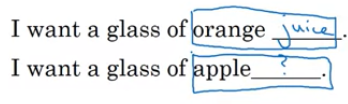

One of the weaknesses of this representation is that it treats each word as a thing unto itself, and it doesn't allow an algorithm to easily generalize the cross words. For example, let's say you have a language model that has learned that when you see I want a glass of orange blank. Well, what do you think the next word will be? Very likely, it'll be juice. But even if the learning algorithm has learned that I want a glass of orange juice is a likely sentence, if it sees I want a glass of apple blank. As far as it knows the relationship between apple and orange is not any closer as the relationship between any of the other words man, woman, king, queen, and orange. And so, it's not easy for the learning algorithm to generalize from knowing that orange juice is a popular thing, to recognizing that apple juice might also be a popular thing or a popular phrase. And this is because the any product between any two different one-hot vector is zero. If you take any two vectors say, queen and king and any product of them, the end product is zero. If you take apple and orange and any product of them, the end product is zero. And you couldn't distance between any pair of these vectors is also the same. So it just doesn't know that somehow apple and orange are much more similar than king and orange or queen and orange. 

### Moving from one hot representation

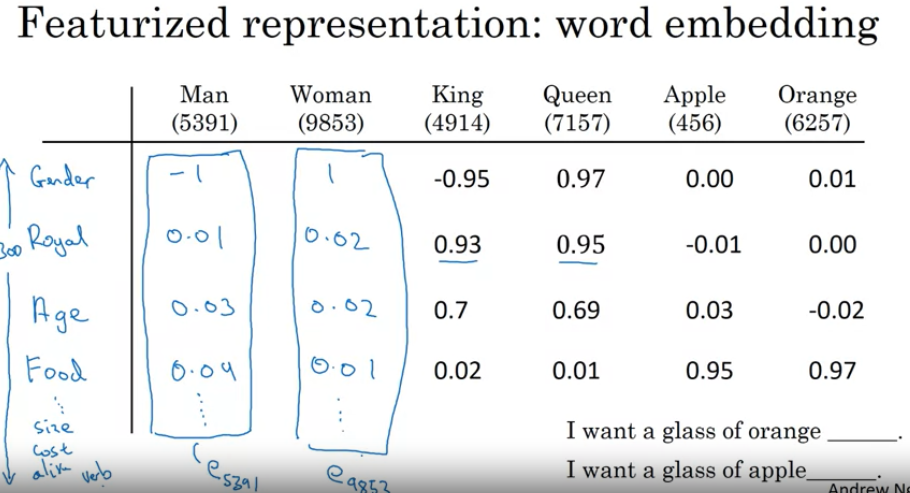

one-hot presentation we can instead learn a featurized representation with each of these words, a man, woman, king, queen, apple, orange or really for every word in the dictionary, we could learn a set of features and values for each of them. 

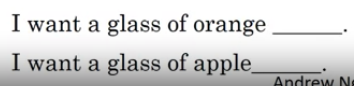

**Words embeddings:** Word embeddings algorithms like this can learn similar features for concepts that feel like they should be more related. We just need you to learn high dimensional feature vectors like these, that gives a better representation than one-hot vectors for representing different words. And the features we'll end up learning, won't have a easy to interpret interpretation like that component one is gender, component two is royal, component three is age and so on. Exactly what they're representing will be a bit harder to figure out. But nonetheless, the featurized representations we will learn, will allow an algorithm to quickly figure out that apple and orange are more similar than say, king and orange or queen and orange

- This generates a relative smaller dimension vector representation for word(i.e 300) comparing to one hot embedding(i.e 10,000)
- This vector will be dense, while one hot vector representation will be sparse
- Transfer Learning(we can take embedding from pretrained on large corpus text and train it on our smaller text)
It has been useful for named entity recognition, for text summarization, for co-reference resolution, for parsing. These are all maybe pretty standard NLP tasks. It has been less useful for language modeling, machine translation, especially if you're accessing a language modeling or machine translation task for which you have a lot of data just dedicated to that task.

### Properties of Word Embedding

One of the most fascinating properties of word embeddings is that they can also help with analogy reasoning. Let's say I pose a question, man is to woman as king is to what? 

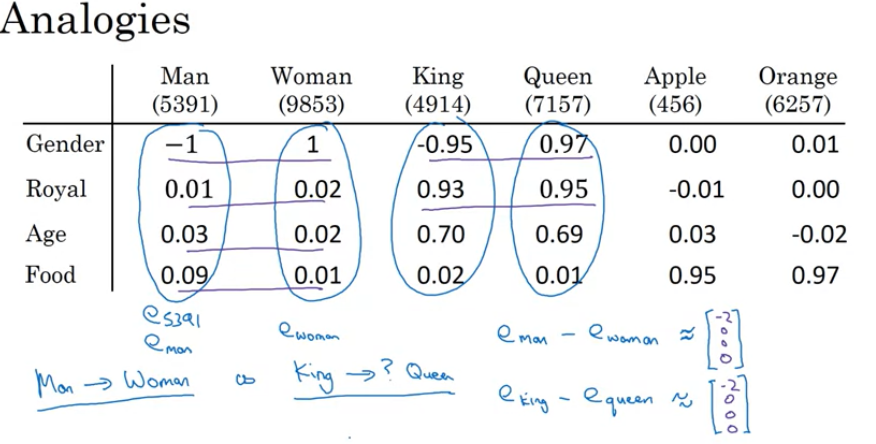

So one way to carry out this analogy reasoning is, if the algorithm is asked, man is to woman as king is to what? What it can do is compute e_man- e_woman, and try to find a vector, try to find a word so that e man- e woman is close to e king- e of that new word. And it turns out that when queen is the word plugged in here, then the left hand side is close to the the right hand side.

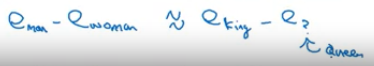

 Tomas Mikolov, Wen-tau Yih, and Geoffrey Zweig

### Embedding Matrix

**When you implement an algorithm to learn a word embedding, what you end up learning is an embedding matrix.**

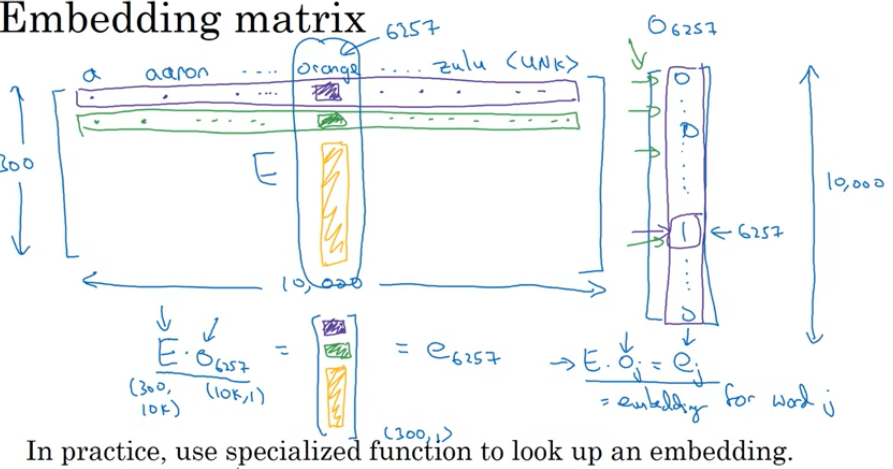

our goal will be to learn an embedding matrix E and we initialize E randomly and you're straight in the sense to learn all the parameters of this 300 by 10,000 dimensional matrix and E times this one-hot vector gives you the embedding vector.

## Learning word Embeddings

The embedding has to be learned by the model(NN model) So, during training, you might want your neural network to do something like input, I want a glass of orange, and then predict the next word in the sequence

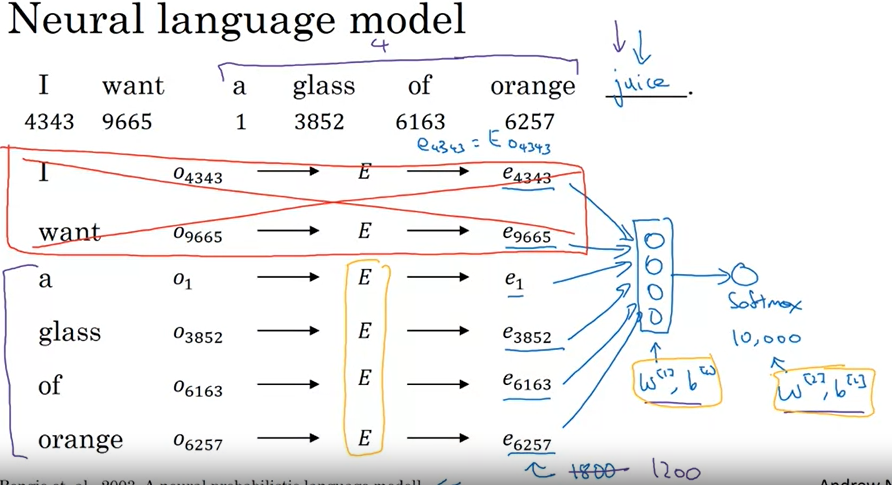

We can pose this problem as predict the predicting one word given the history, you might decide that you always want to predict the next word given say the previous four words, where four here is a hyperparameter of the algorithm. So this is how you adjust to either very long or very short sentences or you decide to always just look at the previous four words, so you say, I will still use those four words. And so, let's just get rid of these. And so, if you're always using a four word history, this means that your neural network will input a 1,200 dimensional feature vector, go into this layer, then have a softmax and try to predict the output. And again, variety of choices. And using a fixed history, just means that you can deal with even arbitrarily long sentences because the input sizes are always fixed. So, the parameters of this model will be this matrix E, and use the same matrix E for all the words. So you don't have different matrices for different positions in the proceedings four words, is the same matrix E. And then, these weights are also parameters of the algorithm and you can use that backprop to perform gradient to sent to maximize the likelihood of your training set to just repeatedly predict given four words in a sequence, what is the next word in your text corpus? And it turns out that this algorithm we'll learn pretty decent word embeddings. And the reason is, if you remember our orange juice, apple juice example, is in the algorithm's incentive to learn pretty similar word embeddings for orange and apple because doing so allows it to fit the training set better because it's going to see orange juice sometimes, or see apple juice sometimes, and so, if you have only a 300 dimensional feature vector to represent all of these words, the algorithm will find that it fits the training set fast. If apples, oranges, and grapes, and pears, and so on and maybe also durians which is a very rare fruit and that with similar feature vectors. So, this is one of the earlier and pretty successful algorithms for learning word embeddings, for learning this matrix E

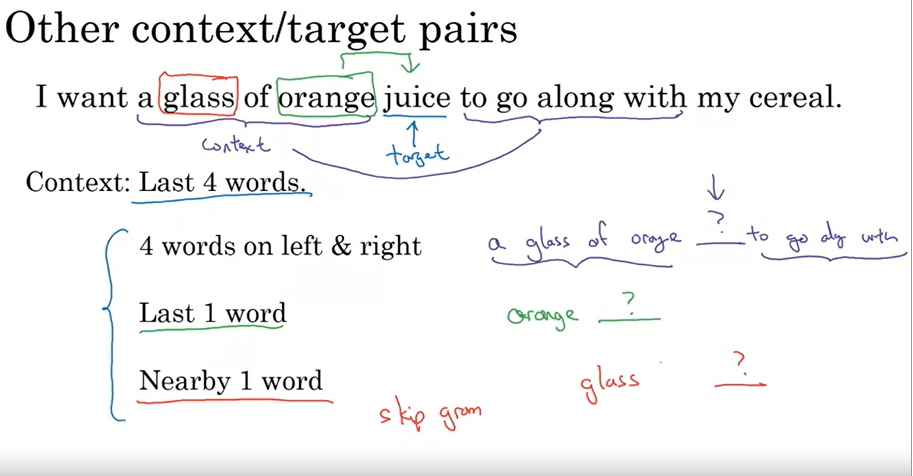

### Word2Vec